# Renew Power Hackathon

In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
## Importing the dataset
df_train=pd.read_csv(r"C:\Users\Shree\Desktop\Kaggle_Hackathons\Hackathons\ReNew_Participants_Data\train.csv")
df_train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [3]:
df_test=pd.read_csv(r"C:\Users\Shree\Desktop\Kaggle_Hackathons\Hackathons\ReNew_Participants_Data\test.csv")
df_test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [4]:
df_train.shape, df_test.shape

((909604, 16), (303202, 14))

In [5]:
## Get a concise summary of a DataFrame.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [6]:
## Generate descriptive statistics.
df_train.describe()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
count,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000
mean,525.886061,537.639468,25.573921,931.130882,60.730112,527.579537,31.755823,31.686413,111.080610,133.692333,199.487161,5.894950,0.651916,46.328595
std,474.619576,482.394907,8.025649,193.674384,9.721582,472.656976,3.929794,3.554426,78.219944,91.232152,104.617261,1.977684,0.317513,2.617691
min,0.000000,0.000008,5.616541,0.000000,25.636366,0.000000,11.141922,16.010218,-318.393721,-5.461607,0.309692,0.904500,0.000000,25.865320
25%,149.620898,155.813244,17.093680,770.538574,54.916767,147.181552,29.913803,30.267423,81.540850,96.045765,98.916060,4.400753,0.432129,44.816740
50%,379.989929,383.985926,27.919035,884.068502,60.034490,391.303187,31.762946,31.961610,92.005826,107.633378,232.821159,5.637207,0.583863,46.302899
75%,781.357475,800.261108,32.171696,1123.335856,65.737187,794.875710,33.469745,33.546260,124.879153,154.153730,287.667503,7.092771,0.798240,47.733105
max,1999.999858,1999.984456,48.089017,1267.140625,129.846405,1999.991455,52.790030,48.406106,523.892695,592.815938,359.455531,19.795001,9.534769,65.037689


In [7]:
## Generate descriptive statistics for categorical data.
df_train.describe(include='object')

,timestamp,turbine_id
count,909604,909604
unique,414692,16
top,2021-07-16 01:52:00,Turbine_15
freq,11,58048


## Missing values

In [8]:
## Check for null values
df_train.isnull().sum()

timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

Observation:
- No missing values good to go.

## Exploratory Data Analysis

In [9]:
df_train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


<AxesSubplot:xlabel='active_power_raw', ylabel='Target'>

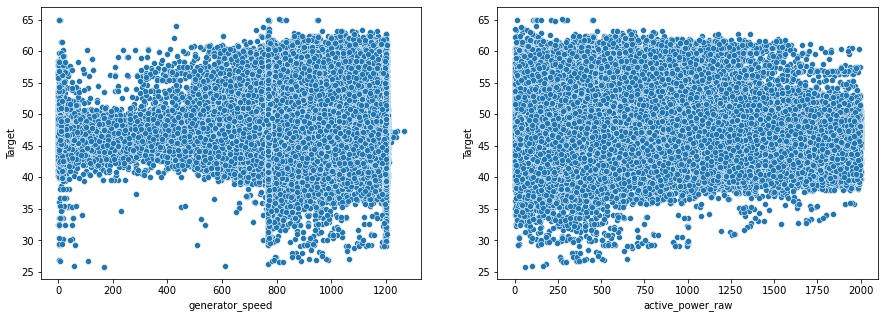

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x="generator_speed",y="Target",data=df_train)
plt.subplot(1,2,2)
sns.scatterplot(x="active_power_raw",y="Target",data=df_train)

## Outlier Treatment

In [11]:
df_train.columns

Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

In [12]:
num_list=[i for i in df_train.columns if df_train[i].dtype != 'object']
len(num_list)

14

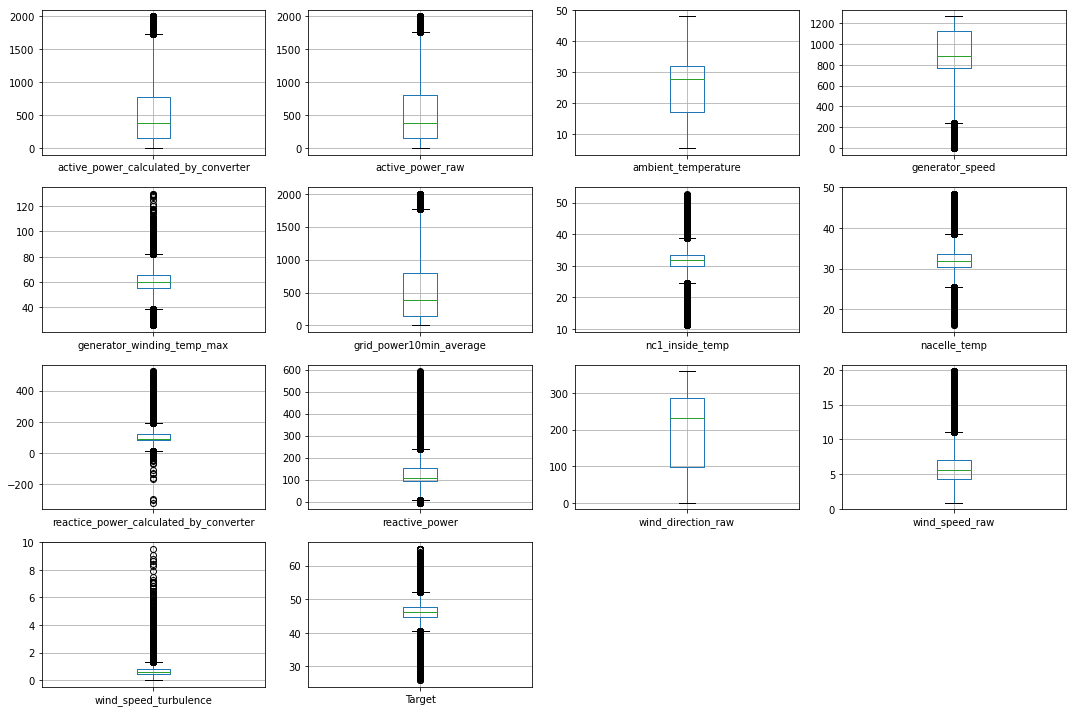

In [13]:
## Check for outliers for all numerical features using boxplot.
plt.figure(figsize=(15,10))
for feature, i in zip(num_list,range(1,15)):
    plt.subplot(4,4,i)
    df_train.boxplot(column=feature)
    plt.tight_layout() 

### Handling upper and lower whisker outliers

In [14]:
df_train[num_list].columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'Target'],
      dtype='object')

In [15]:
## Handling upper whisker outliers
upper=['active_power_calculated_by_converter', 'active_power_raw','generator_winding_temp_max','grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power','wind_speed_raw', 'wind_speed_turbulence','Target']

for feature in upper:
    p_95 = np.percentile(df_train[feature], 95)
    df_train.loc[df_train[feature] > p_95, feature] = p_95

## Handling lower whisker outliers
lower=['generator_speed', 'generator_winding_temp_max','nc1_inside_temp', 'nacelle_temp','reactice_power_calculated_by_converter', 'reactive_power',
       'Target']

for feature in lower:
    p_5= np.percentile(df_train[feature], 5)
    df_train.loc[df_train[feature] < p_5,feature] = p_5

### Checking features after outliers treatment

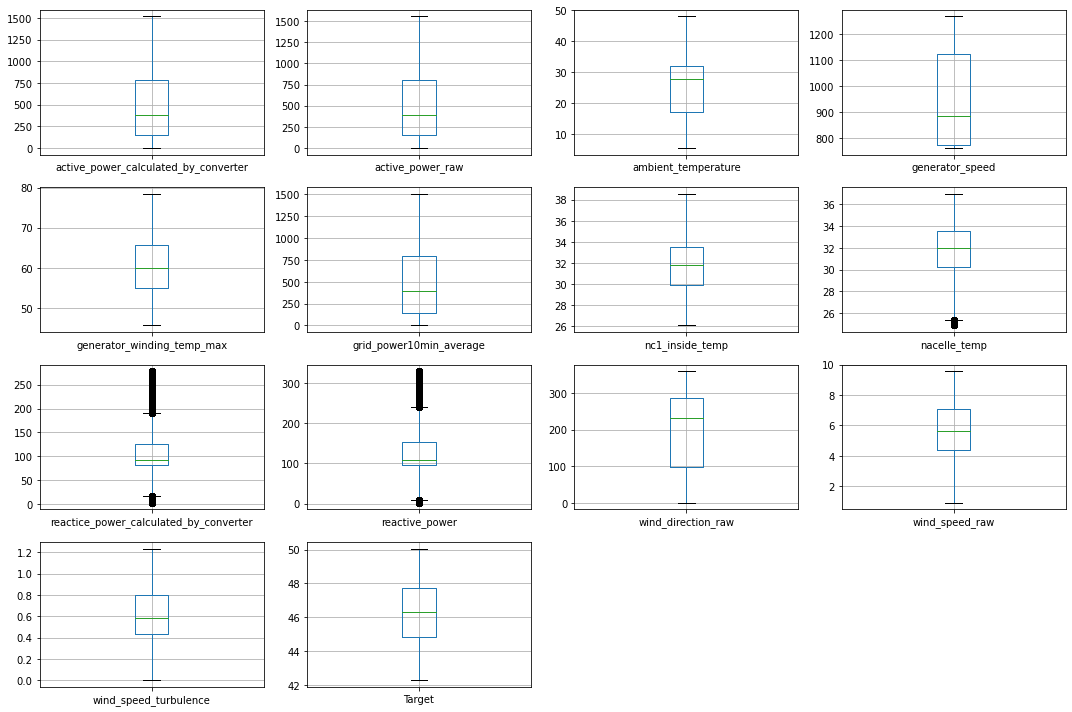

In [16]:
plt.figure(figsize=(15,10))
for feature, i in zip(num_list,range(1,15)):
    plt.subplot(4,4,i)
    df_train.boxplot(column=feature)
    plt.tight_layout() 

## Multicollinearity

In [17]:
## Show the correlation between numericals features.
df_train.corr()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
active_power_calculated_by_converter,1.000000,0.996825,-0.060934,0.939114,0.695379,0.952936,-0.044443,-0.117759,0.854700,0.889069,0.047301,0.942200,0.536697,-0.041621
active_power_raw,0.996825,1.000000,-0.057410,0.938080,0.692418,0.951586,-0.043507,-0.113860,0.843199,0.880370,0.047123,0.939699,0.541421,-0.040236
ambient_temperature,-0.060934,-0.057410,1.000000,-0.055847,0.095565,-0.067550,0.257256,0.359579,-0.097827,-0.099697,-0.015721,-0.090750,0.050206,0.439567
generator_speed,0.939114,0.938080,-0.055847,1.000000,0.630007,0.902365,-0.048968,-0.134663,0.755621,0.795654,0.038082,0.898337,0.507532,-0.037544
generator_winding_temp_max,0.695379,0.692418,0.095565,0.630007,1.000000,0.736486,0.043611,0.245464,0.648601,0.667632,0.099493,0.629671,0.477363,0.315012
grid_power10min_average,0.952936,0.951586,-0.067550,0.902365,0.736486,1.000000,-0.049877,-0.133605,0.810254,0.845823,0.050043,0.902453,0.530985,-0.048562
nc1_inside_temp,-0.044443,-0.043507,0.257256,-0.048968,0.043611,-0.049877,1.000000,0.594067,-0.042708,-0.048629,0.057095,-0.045954,0.045554,0.187981
nacelle_temp,-0.117759,-0.113860,0.359579,-0.134663,0.245464,-0.133605,0.594067,1.000000,-0.104273,-0.113474,0.148433,-0.170016,0.174114,0.550334
reactice_power_calculated_by_converter,0.854700,0.843199,-0.097827,0.755621,0.648601,0.810254,-0.042708,-0.104273,1.000000,0.991793,0.032124,0.800570,0.439906,-0.049287
reactive_power,0.889069,0.880370,-0.099697,0.795654,0.667632,0.845823,-0.048629,-0.113474,0.991793,1.000000,0.035044,0.840817,0.460738,-0.050469


<AxesSubplot:>

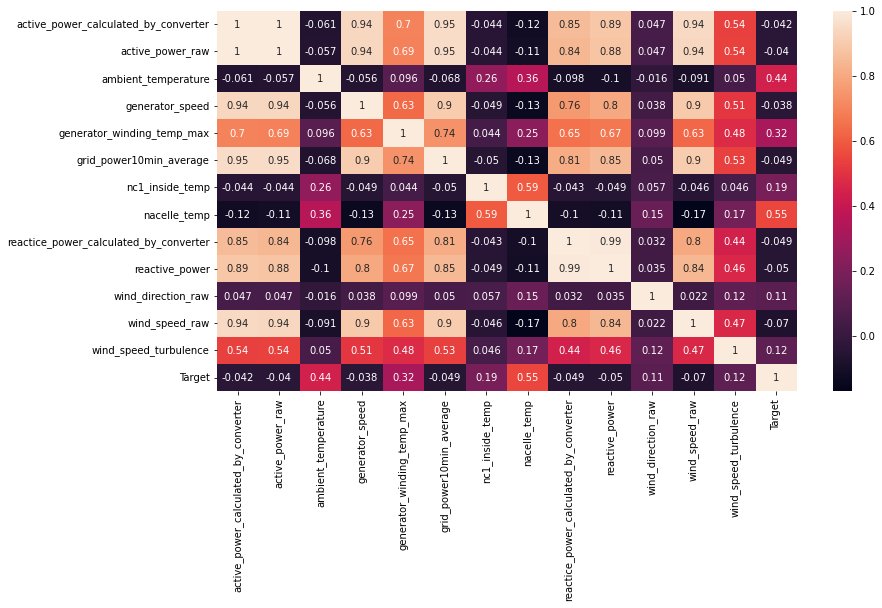

In [18]:
plt.figure(figsize=(13,7))
sns.heatmap(df_train.corr(),annot=True)

## variance_inflation_factor

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif = pd.DataFrame()  ## Create empty dataframe
vif["variables"] = df_train[num_list].columns
vif["VIF"] = [variance_inflation_factor(df_train[num_list].values, i) for i in range(df_train[num_list].shape[1])]

vif

,variables,VIF
0,active_power_calculated_by_converter,459.487427
1,active_power_raw,411.595247
2,ambient_temperature,13.731109
3,generator_speed,238.069915
4,generator_winding_temp_max,194.127683
5,grid_power10min_average,33.302369
6,nc1_inside_temp,187.642748
7,nacelle_temp,325.128329
8,reactice_power_calculated_by_converter,319.738668
9,reactive_power,415.471776


Observation:
- VIF(active_power_calculated_by_converter) > VIF(active_power_raw)    ----> Corelation coeff. = 1
- VIF(active_power_calculated_by_converter) > VIF(generator_speed)     ----> Corelation coeff. = 0.94
- VIF(active_power_raw) > VIF(generator_speed)                         ----> Corelation coeff. = 0.94
- VIF(active_power_raw) > VIF(grid_power10min_average)                 ----> Corelation coeff. = 0.95
- VIF(generator_speed) > VIF(wind_speed_raw)                           ----> Corelation coeff. = 0.9
- VIF(generator_speed) > VIF(grid_power10min_average)                  ----> Corelation coeff. = 0.9
- VIF(reactive_power) > VIF(reactice_power_calculated_by_converter)    ----> Corelation coeff. = 0.99

Among two features whichever having higher VIF value remove(ignore) that feature as its the reductant feature.

In [21]:
df_final=df_train.copy()
df_final.drop(columns=["active_power_calculated_by_converter","active_power_raw","generator_speed","reactive_power"],axis=1,inplace=True)

In [22]:
df_final.columns

Index(['timestamp', 'ambient_temperature', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'wind_direction_raw',
       'wind_speed_raw', 'wind_speed_turbulence', 'turbine_id', 'Target'],
      dtype='object')

In [23]:
num_list=[i for i in df_final.columns if df_final[i].dtype != 'object']
len(num_list)

10

## Checking distribution of each feature 

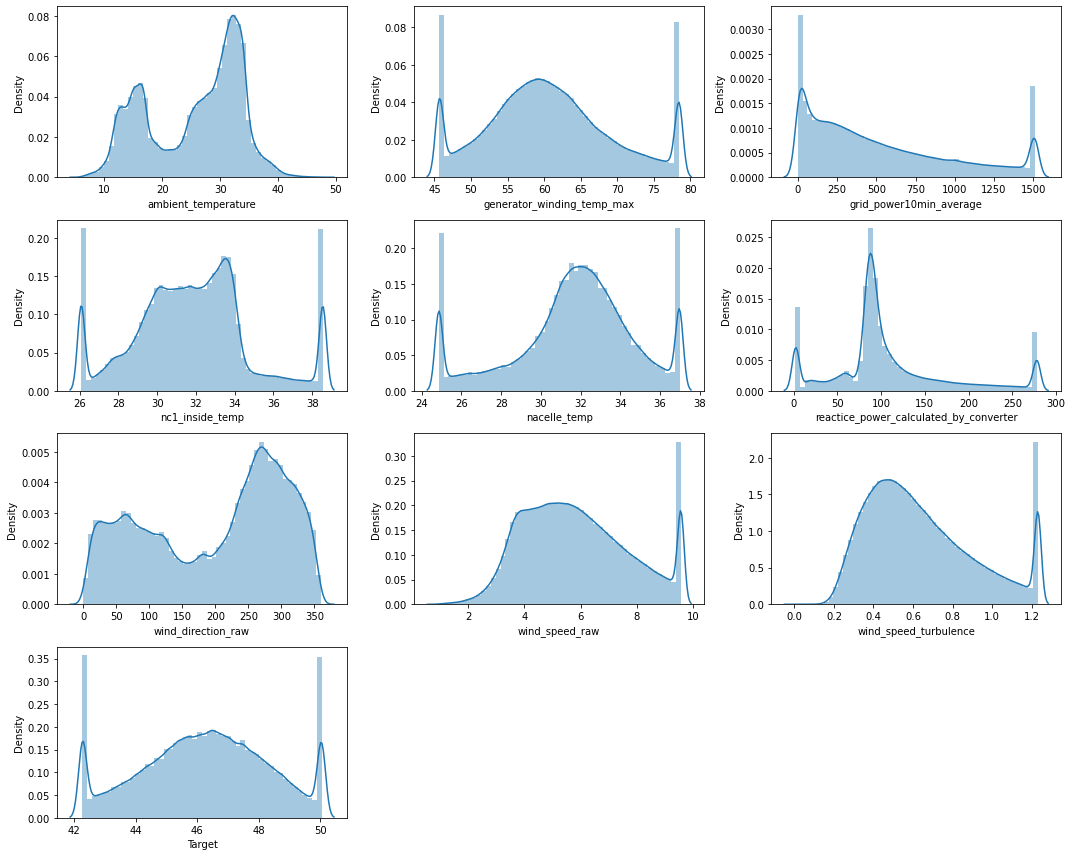

In [24]:
plt.figure(figsize=(15,12))
for feature,i in zip(num_list,range(1,11)):
    plt.subplot(4,3,i)
    sns.distplot(df_final[feature],kde=True)
    plt.tight_layout()

### Checking skewness value for numerical column

In [25]:
right_skewed={}
left_skewed={}
normal={}

for feature in df_final[num_list].columns:
    s=stats.skew(df_final[feature])
    if(s > 0):
        right_skewed[feature]=round(s,2)
    elif(s < 0):
        left_skewed[feature]=round(s,2)
    else:
        normal[feature]=round(s,2)

In [26]:
right_skewed

{'generator_winding_temp_max': 0.29,
 'grid_power10min_average': 0.81,
 'nc1_inside_temp': 0.28,
 'reactice_power_calculated_by_converter': 0.98,
 'wind_speed_raw': 0.34,
 'wind_speed_turbulence': 0.67}

In [27]:
for feature in right_skewed.keys():
    print(f"{feature} : {stats.skew(np.log(df_final[feature]+1))}")  # lognormal transformation

generator_winding_temp_max : -0.019017261234197787
grid_power10min_average : -1.4241330155954546
nc1_inside_temp : 0.007122916129965695
reactice_power_calculated_by_converter : -2.0370913874999608
wind_speed_raw : -0.2345117564862721
wind_speed_turbulence : 0.3884445091291925


In [28]:
for feature in right_skewed.keys():
    print(f"{feature} : {stats.skew(np.sqrt(df_final[feature]))}") # sqrt transformation

generator_winding_temp_max : 0.13460086243877598
grid_power10min_average : 0.05673232841467566
nc1_inside_temp : 0.13749912187338176
reactice_power_calculated_by_converter : -0.4117980172074745
wind_speed_raw : 0.01520060732102947
wind_speed_turbulence : 0.2901463527030923


In [29]:
df_final["generator_winding_temp_max"] = np.log(df_final["generator_winding_temp_max"]+1)
df_final["grid_power10min_average"] = np.sqrt(df_final["grid_power10min_average"])
df_final["nc1_inside_temp"] = np.log(df_final["nc1_inside_temp"]+1)
df_final["reactice_power_calculated_by_converter"] = np.sqrt(df_final["reactice_power_calculated_by_converter"])
df_final["wind_speed_raw"] = np.sqrt(df_final["wind_speed_raw"])
df_final["wind_speed_turbulence"] = np.sqrt(df_final["wind_speed_turbulence"])

In [30]:
left_skewed

{'ambient_temperature': -0.41,
 'nacelle_temp': -0.5,
 'wind_direction_raw': -0.36,
 'Target': -0.09}

In [31]:
for feature in left_skewed.keys():
    print(f"{feature} : {stats.skew(stats.boxcox(df_final[feature])[0])}")

ambient_temperature : -0.23896920382261597
nacelle_temp : -0.028467928338832615
wind_direction_raw : -0.412049165533601
Target : -0.018577089916095784


In [32]:
df_final["ambient_temperature"] = stats.boxcox(df_final["ambient_temperature"])[0]
df_final["nacelle_temp"] = stats.boxcox(df_final["nacelle_temp"])[0]
df_final["wind_direction_raw"] = stats.boxcox(df_final["wind_direction_raw"])[0]

## Data Preprocessing

In [33]:
df_final

,timestamp,ambient_temperature,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,100.650269,4.204009,30.296816,3.492925,6677.263958,11.893597,198.205943,2.656501,0.737619,Turbine_108,47.582787
1,2021-04-27 04:55:00,27.007479,4.103821,21.108156,3.509265,7463.030499,9.443858,210.446567,2.339858,0.684859,Turbine_18,46.070328
2,2021-01-25 06:26:00,39.348882,4.131488,36.942063,3.298698,3392.516922,15.186254,64.828048,2.844724,0.788871,Turbine_105,42.265287
3,2021-10-30 03:47:00,85.761572,3.842702,3.784825,3.562556,7402.732820,8.137015,66.478237,2.017680,0.872192,Turbine_15,46.056587
4,2021-03-15 00:39:00,99.844876,4.179631,24.474889,3.508723,6654.083727,11.711701,219.691480,2.521496,0.588276,Turbine_01,50.047297
...,...,...,...,...,...,...,...,...,...,...,...,...
909599,2021-04-25 19:12:00,105.489023,4.375040,36.651338,3.505299,9131.105548,12.337603,137.656345,2.674947,1.014377,Turbine_13,50.047297
909600,2021-02-20 17:37:00,95.371999,4.047174,13.327436,3.447900,5768.556141,9.238675,70.877690,2.030174,0.771929,Turbine_158,44.234821
909601,2021-10-22 14:18:00,97.012336,4.157991,29.553589,3.449728,7679.444244,6.543715,165.224773,2.924324,0.975316,Turbine_15,46.942486
909602,2021-02-08 22:03:00,105.310625,4.064662,9.791103,3.506723,6689.787949,9.303177,50.660814,2.079438,0.497328,Turbine_97,46.392221


In [34]:
## As Timestamp is the unique identifier of the data better to drop this column.
df_final.drop(columns="timestamp",axis=1,inplace=True)

In [35]:
## Impute mean ambient tempature for turbine_id column
#turbine_id_dict = df_final.groupby("turbine_id")["ambient_temperature"].mean().to_dict()
#df_final["turbine_id"] = df_final["turbine_id"].map(turbine_id_dict)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 
df_final["turbine_id"] = encoder.fit_transform(df_final["turbine_id"])
df_final["turbine_id"].head()

0     4
1    12
2     3
3    10
4     0
Name: turbine_id, dtype: int32

In [36]:
df_final

,ambient_temperature,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,100.650269,4.204009,30.296816,3.492925,6677.263958,11.893597,198.205943,2.656501,0.737619,4,47.582787
1,27.007479,4.103821,21.108156,3.509265,7463.030499,9.443858,210.446567,2.339858,0.684859,12,46.070328
2,39.348882,4.131488,36.942063,3.298698,3392.516922,15.186254,64.828048,2.844724,0.788871,3,42.265287
3,85.761572,3.842702,3.784825,3.562556,7402.732820,8.137015,66.478237,2.017680,0.872192,10,46.056587
4,99.844876,4.179631,24.474889,3.508723,6654.083727,11.711701,219.691480,2.521496,0.588276,0,50.047297
...,...,...,...,...,...,...,...,...,...,...,...
909599,105.489023,4.375040,36.651338,3.505299,9131.105548,12.337603,137.656345,2.674947,1.014377,7,50.047297
909600,95.371999,4.047174,13.327436,3.447900,5768.556141,9.238675,70.877690,2.030174,0.771929,11,44.234821
909601,97.012336,4.157991,29.553589,3.449728,7679.444244,6.543715,165.224773,2.924324,0.975316,10,46.942486
909602,105.310625,4.064662,9.791103,3.506723,6689.787949,9.303177,50.660814,2.079438,0.497328,15,46.392221


Observation:
- Now the above dataframe is ready so we can use it for applying any machine learning model to predict output.

## Spliting features & target values

In [37]:
x=df_final.drop(columns="Target",axis=1)
y=df_final["Target"]

In [38]:
x.shape , y.shape

((909604, 10), (909604,))

## Splitting dataset into training & cross validation data

In [39]:
x_train,x_valid,y_train,y_valid =train_test_split(x,y,test_size=0.3,random_state=2)

In [40]:
x_train.shape,x_valid.shape

((636722, 10), (272882, 10))

## Scaling Data (Standardization)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

## Model Training Function

In [43]:
def model_train_func(model):
    
    ## Fit on training data
    model.fit(x_train,y_train)
    
    ## Predict values using train data
    y_train_predict = model.predict(x_train)
    ## Predict values using validation data
    y_valid_predict = model.predict(x_valid)
    
    ## Model Evaluation
    mape_train = mean_absolute_percentage_error(y_train,y_train_predict)
    mape_valid = mean_absolute_percentage_error(y_valid,y_valid_predict)
    r2score = r2_score(y_valid,y_valid_predict)
    
    print('MAPE for train data:', mape_train)
    print('MAPE for CV data:', mape_valid)
    print('R2 Score:', r2score)

    return y_train_predict,y_valid_predict,[mape_train,mape_valid,r2score]

# Model 1:  Linear Regression 

In [44]:
model_lr=linear_model.LinearRegression(n_jobs=-1)

y_train_predict_lr,y_valid_predict_lr,score_lr = model_train_func(model_lr)

MAPE for train data: 0.025271329096022054
MAPE for CV data: 0.025292405023266646
R2 Score: 0.4819449365582802


In [45]:
print('Slope:' ,model_lr.coef_)

Slope: [ 0.5844491   0.8054971  -0.49389966 -0.260126    0.82871786 -0.14178821
  0.07127216  0.13310455 -0.05868697 -0.32897957]


In [46]:
print('Intercept:',model_lr.intercept_)

Intercept: 46.243012421480294


# Model 2: KNN Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import cross_val_score

In [48]:
def val_score_func(n_neighbors):
    mape_cv_score = []
    
    for i in n_neighbors:
        mape_score = cross_val_score(KNR(n_neighbors=i, n_jobs=-1) , X=x_train, y=y_train, cv=5, 
                                     scoring='neg_mean_absolute_percentage_error')
        # Adding score to list
        mape_cv_score.append(mape_score.mean())
        
    return mape_cv_score

In [49]:
n_neighbors = [3,5,7,9]
cv_score = val_score_func(n_neighbors)

In [50]:
cv_score

[-0.014968965603850174,
 -0.01502854028976108,
 -0.015172083264227865,
 -0.015316444523833007]

### Ploting Validation Score for each K value

In [51]:
pd.DataFrame({"n_neighbors":n_neighbors,"CV Score":cv_score}).sort_values(by="CV Score", ascending=False)

,n_neighbors,CV Score
0,3,-0.014969
1,5,-0.015029
2,7,-0.015172
3,9,-0.015316


Text(0.5, 1.0, 'Cross Validation Score')

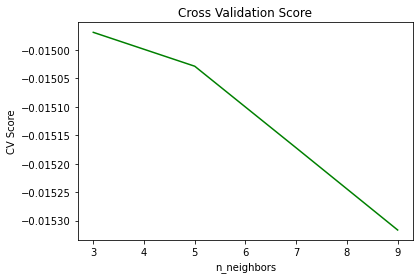

In [52]:
plt.plot(n_neighbors, cv_score, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('CV Score')
plt.title('Cross Validation Score')

### Build optimal model with k=3

In [53]:
# Creating instance of KNN
model_KNR = KNR(n_neighbors = 3,n_jobs=-1)

y_train_predict_KNR,y_valid_predict_KNR,score_KNR = model_train_func(model_KNR)

MAPE for train data: 0.00972824966709139
MAPE for CV data: 0.014528282229531146
R2 Score: 0.7704473356496142


# Model 3 : SVM Regressor

In [54]:
from sklearn.svm import SVR

In [55]:
#model_SVR = SVR()

#y_train_predict_SVR,y_valid_predict_SVR = model_train_func(model_SVR)

# Model 4 : Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [57]:
def RFR_val_score(depth):
    RFR_cv_score = []
    
    for i in depth:
        mape_score = cross_val_score(estimator=RFR(max_depth=i,n_jobs=-1,random_state=11),
                                     X=x_train, y=y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
        
        RFR_cv_score.append(mape_score.mean())
        
    return RFR_cv_score

In [58]:
#max_depth = [5,7,10,15]
#RFR_cv_score=RFR_val_score(max_depth)

In [59]:
model_RFR = RandomForestRegressor(n_estimators=400,max_depth=7,min_samples_split=5,min_samples_leaf=5,
                                  max_features='auto',n_jobs=-1,random_state=11)

y_train_predict_RFR,y_valid_predict_RFR,score_RFR = model_train_func(model_RFR)

MAPE for train data: 0.020879995802686267
MAPE for CV data: 0.020905741047434805
R2 Score: 0.6283694647831344


## Model 5 : XGBoost Regressor

In [60]:
import xgboost as xgb

In [61]:
model_XGB = xgb.XGBRegressor(n_estimators=200,max_depth=5,n_jobs=-1,subsample=0.8)

y_train_predict_XGB,y_valid_predict_XGB,score_XGB = model_train_func(model_XGB)

MAPE for train data: 0.016225449384634213
MAPE for CV data: 0.016505764395939423
R2 Score: 0.7605251565833124


In [62]:
y_train_predict_lr

array([47.98858428, 45.56023023, 47.27211079, ..., 46.97271935,
       45.53787237, 49.46734743])

In [63]:
## Combine models together to get better results

final_y_train = (y_train_predict_lr + y_train_predict_KNR + y_train_predict_RFR + y_train_predict_XGB)/4
final_y_valid = (y_valid_predict_lr + y_valid_predict_KNR + y_valid_predict_RFR + y_valid_predict_XGB)/4

final_mape_train = mean_absolute_percentage_error(y_train,final_y_train)
final_mape_valid = mean_absolute_percentage_error(y_valid,final_y_valid)
final_r2score = r2_score(y_valid,final_y_valid)
    
print('MAPE for train data:', final_mape_train)
print('MAPE for CV data:', final_mape_valid)
print('R2 Score:', final_r2score)

MAPE for train data: 0.01628984847083703
MAPE for CV data: 0.017418029432217916
R2 Score: 0.7439817595851457


## Model Performance Comparision

In [64]:
model=['Linear Regression','KNN Regressor','Random Forest Regressor','XGBoost Regressor','Combine_Models']
mape_list=[score_lr[1],score_KNR[1],score_RFR[1],score_XGB[1],final_mape_valid]
r2_list=[score_lr[2],score_KNR[2],score_RFR[2],score_XGB[2],final_r2score]

model_df=pd.DataFrame({"Model":model,"MAPE":mape_list,"R2_score":r2_list})
model_df.sort_values(by=["MAPE"],ascending=True)

,Model,MAPE,R2_score
1,KNN Regressor,0.014528,0.770447
3,XGBoost Regressor,0.016506,0.760525
4,Combine_Models,0.017418,0.743982
2,Random Forest Regressor,0.020906,0.628369
0,Linear Regression,0.025292,0.481945


## Model Pipeline (Test Data)

In [65]:
df_test

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465,Turbine_158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303197,1754.986613,1797.301392,39.138250,1201.708130,85.610317,1631.455973,38.890467,38.542006,341.591410,404.388580,322.968750,10.402939,1.133143,Turbine_10
303198,961.416738,970.462962,33.718848,1194.447693,72.564436,979.040192,33.418560,33.190632,158.035688,186.806035,309.976791,7.312443,0.829828,Turbine_97
303199,5.583539,18.309381,29.148418,771.026876,62.844919,114.049691,29.836640,31.198618,56.898274,62.813501,330.593165,3.404537,0.622060,Turbine_120
303200,34.711766,26.472111,31.942072,769.952612,63.219437,28.972680,30.332543,31.662434,15.277295,21.483844,133.001864,3.597401,0.252044,Turbine_01


In [66]:
df_test.shape

(303202, 14)

In [67]:
df_test.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
dtype: int64

In [68]:
df_test.corr()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
active_power_calculated_by_converter,1.000000,0.996370,-0.054846,0.866857,0.704931,0.951295,-0.049711,-0.112915,0.859552,0.890320,0.052019,0.934693,0.519093
active_power_raw,0.996370,1.000000,-0.052432,0.856565,0.700520,0.950586,-0.049053,-0.110569,0.846465,0.879922,0.051754,0.932291,0.521290
ambient_temperature,-0.054846,-0.052432,1.000000,-0.064645,0.091488,-0.061694,0.255962,0.361292,-0.080402,-0.084254,-0.019572,-0.087006,0.049690
generator_speed,0.866857,0.856565,-0.064645,1.000000,0.581606,0.832533,-0.064720,-0.156865,0.701710,0.727524,0.041019,0.833348,0.407185
generator_winding_temp_max,0.704931,0.700520,0.091488,0.581606,1.000000,0.748161,0.057787,0.230118,0.666604,0.682697,0.097836,0.636326,0.458785
grid_power10min_average,0.951295,0.950586,-0.061694,0.832533,0.748161,1.000000,-0.056939,-0.132132,0.807743,0.840193,0.052336,0.894985,0.501881
nc1_inside_temp,-0.049711,-0.049053,0.255962,-0.064720,0.057787,-0.056939,1.000000,0.692220,-0.045040,-0.050725,0.063215,-0.060249,0.067715
nacelle_temp,-0.112915,-0.110569,0.361292,-0.156865,0.230118,-0.132132,0.692220,1.000000,-0.088588,-0.098089,0.143246,-0.167056,0.164440
reactice_power_calculated_by_converter,0.859552,0.846465,-0.080402,0.701710,0.666604,0.807743,-0.045040,-0.088588,1.000000,0.993386,0.038757,0.792390,0.444126
reactive_power,0.890320,0.879922,-0.084254,0.727524,0.682697,0.840193,-0.050725,-0.098089,0.993386,1.000000,0.041801,0.828930,0.460552


<AxesSubplot:>

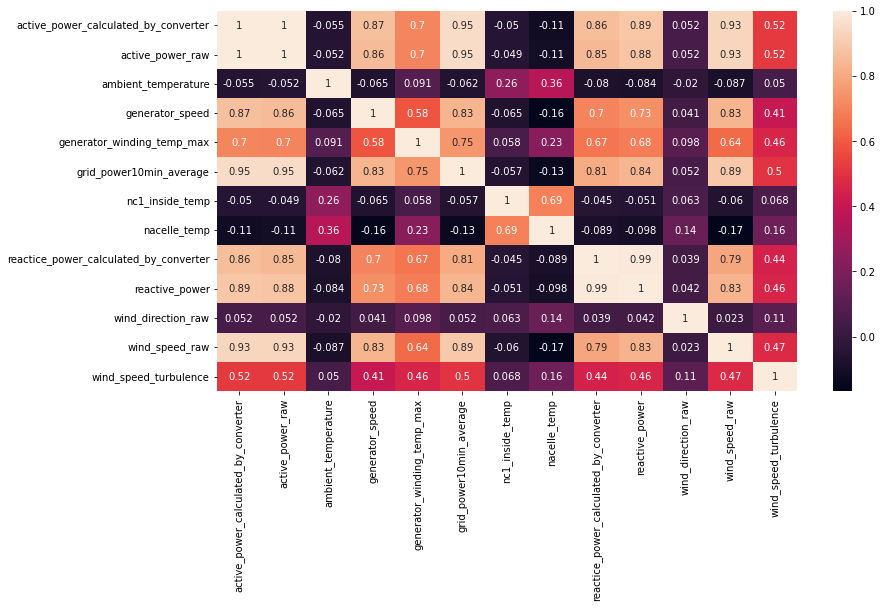

In [69]:
plt.figure(figsize=(13,7))
sns.heatmap(df_test.corr(),annot=True)

In [70]:
def model_pipeline_func(df):
    ## Drop columns which are reductant (high VIF value)
    df.drop(columns=["active_power_calculated_by_converter","active_power_raw","generator_speed","reactive_power"],
                          axis=1,inplace=True)
    
    ## Feature Transformation to remove skewness in feature
    df["generator_winding_temp_max"] = np.log(df["generator_winding_temp_max"]+1)
    df["grid_power10min_average"] = np.sqrt(df["grid_power10min_average"])
    df["nc1_inside_temp"] = np.log(df["nc1_inside_temp"]+1)
    df["reactice_power_calculated_by_converter"] = np.sqrt(df["reactice_power_calculated_by_converter"])
    df["wind_speed_raw"] = np.sqrt(df["wind_speed_raw"])
    df["wind_speed_turbulence"] = np.sqrt(df["wind_speed_turbulence"])
    
    ## Impute missing values
    df["reactice_power_calculated_by_converter"] = df["reactice_power_calculated_by_converter"].fillna(df["reactice_power_calculated_by_converter"].mean())
    
    ## Label Encoding for turbine_id column
    df["turbine_id"] = encoder.transform(df["turbine_id"])
    
    ## Standardization
    df = sc.transform(df)
    
    return df

In [71]:
x_test = model_pipeline_func(df_test)

In [72]:
x_test

array([[-1.10380044, -0.32879971, -1.0368759 , ..., -2.14994939,
         0.66005137,  0.31768099],
       [-1.96389878, -1.05680154,  0.19490703, ...,  0.11312555,
        -0.26325621,  1.18894253],
       [-1.44648041,  0.0517128 , -0.02871049, ...,  0.12629617,
        -0.39209641,  0.31768099],
       ...,
       [-1.44519772,  0.32457472, -0.89374205, ..., -1.41026535,
         0.04789448, -0.55358055],
       [-1.35915723,  0.36709706, -1.39456807, ..., -1.27579695,
        -1.70073112, -1.64265748],
       [-1.44141841, -0.6327284 ,  0.02241061, ...,  0.33279809,
        -1.02316555, -0.77139594]])

In [73]:
x_test.shape

(303202, 10)

## Model Prediction

In [74]:
y_test_predict_lr = model_lr.predict(x_test)
y_test_predict_KNR = model_KNR.predict(x_test)
y_test_predict_RFR = model_RFR.predict(x_test)
y_test_predict_XGB = model_XGB.predict(x_test)

In [75]:
final_y_test = (y_test_predict_lr + y_test_predict_KNR + y_test_predict_RFR + y_test_predict_XGB)/4
final_y_test

array([43.41234171, 41.96699251, 42.74198898, ..., 43.21783073,
       45.65253254, 43.99289497])

In [76]:
submission = pd.DataFrame({"Target":final_y_test})
submission

,Target
0,43.412342
1,41.966993
2,42.741989
3,43.320732
4,42.516030
...,...
303197,44.733596
303198,43.313306
303199,43.217831
303200,45.652533
